# Filter anordnare och statistik om dem

In [96]:
# read in resultat ansökningar 2024 csv
import pandas as pd



df_resutalt_ansonkningar = pd.read_excel(
    "../../data/2024_kurser/resultat-2024-for-kurser-inom-yh.xlsx",
    sheet_name="Beviljade ansökningar",
)


df_resutalt_ansonkningar.head(10)

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1009,Beviljad,Plushögskolan AB - Affärshögskolan,Strategisk hållbarhetsutveckling,"Ekonomi, administration och försäljning",50,0,50,100,45,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",4,4,4
1,MYH 2024/1010,Beviljad,IHM Business School AB Göteborg,Social media marketing,"Ekonomi, administration och försäljning",50,0,50,100,40,Göteborg,Västra Götaland,Göteborg,1,1,1
2,MYH 2024/1016,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,"E-hälsa, digitalisering och välfärdsteknik ino...",Hälso- och sjukvård samt socialt arbete,0,50,0,50,50,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,4,5
3,MYH 2024/1017,Beviljad,Hyper Island Program AB - Karlskrona,Sustainability Change Leadership,"Ekonomi, administration och försäljning",55,0,55,110,55,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",2,2,2
4,MYH 2024/1018,Beviljad,Plushögskolan AB - Affärshögskolan,Digitalisering och systemkunskap inom lön - Sp...,"Ekonomi, administration och försäljning",50,0,50,100,30,Gävle,Gävleborg,Gävle,1,1,1
5,MYH 2024/1019,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Psykisk hälsa och suicidprevention,Hälso- och sjukvård samt socialt arbete,0,50,0,50,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5
6,MYH 2024/1020,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Psykisk ohälsa hos äldre,Hälso- och sjukvård samt socialt arbete,50,0,50,100,60,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5
7,MYH 2024/1022,Beviljad,Nackademin AB,BIM verktyg: Punktmolnsmodellering och Virtual...,Samhällsbyggnad och byggteknik,32,0,32,64,20,Solna,Stockholm,Stockholm,1,1,1
8,MYH 2024/1023,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Funktionsnedsättningar och samsjuklighet,Hälso- och sjukvård samt socialt arbete,0,70,0,70,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",4,4,4
9,MYH 2024/1024,Beviljad,Plushögskolan AB - Vårdyrkeshögskolan,Missbruk och beroende,Hälso- och sjukvård samt socialt arbete,50,0,50,100,30,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",5,5,5


In [97]:
# read in inkomna ansökningar 2024

df_inkomna_ansökningar = pd.read_excel(
    "../../data/2024_kurser/inkomna-ansokningar-2024-for-kurser.xlsx",
    sheet_name="Lista ansökningar",
)

df_inkomna_ansökningar.head()

,Diarienummer,Anordnare namn,Utbildningsnamn,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Changemaker Educations AB,Futuregames Accessible Game Production,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Changemaker Educations AB,Futuregames Inclusive Game Development,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",40,40,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [98]:
df_resutalt_ansonkningar["Anordnare namn"].unique().shape

(111,)

In [99]:
df_beviljade_2024 = df_resutalt_ansonkningar[
    ["Anordnare namn", "Antal beviljade platser start 2024"]
].groupby("Anordnare namn")["Antal beviljade platser start 2024"].sum().to_frame().rename(columns={"Antal beviljade platser start 2024": "Total beviljade platser 2024"})

In [100]:
df_beviljade_2024.sort_values(by="Total beviljade platser 2024", ascending=False)

,Total beviljade platser 2024
Anordnare namn,
IHM Business School AB Göteborg,860
Medieinstitutet i Sverige AB,457
YH Akademin AB,435
Nackademin AB,336
TUC Sweden AB - Yrkeshögskola,285
...,...
Sveriges Yrkeshögskola AB - Göteborg Yrkeshögskola,0
Västerås Stad/Barn- och Utbildningsförvaltningen/Västerås Yrkeshögskola,0
YH Akademin(Marknad),0


In [101]:
df_beviljade_start_avslut_2024 = df_resutalt_ansonkningar[
    ["Anordnare namn", "Antal beviljade platser start och slut 2024"]
].groupby("Anordnare namn")["Antal beviljade platser start och slut 2024"].sum().to_frame().rename(columns={"Antal beviljade platser start och slut 2024": "Total beviljade platser start och slut 2024"})

In [102]:
df_beviljade_start_avslut_2024.sort_values(by= "Total beviljade platser start och slut 2024", ascending=False)

,Total beviljade platser start och slut 2024
Anordnare namn,
YH Akademin AB,660
Medieinstitutet i Sverige AB,415
IHM Business School AB Göteborg,400
Nackademin AB,335
"Göteborgs Stad, Yrgo",289
...,...
Plushögskolan AB - Teknikhögskolan,0
Stiftelsen Capellagården,0
Tekniska Högskolan i Jönköping AB,0


In [103]:
df_beviljade_2025 = df_resutalt_ansonkningar[
    ["Anordnare namn", "Antal beviljade platser start 2025"]
].groupby("Anordnare namn")["Antal beviljade platser start 2025"].sum().to_frame().rename(columns={"Antal beviljade platser start 2025": "Total beviljade platser 2025"})

In [104]:
df_beviljade_2025.sort_values(by="Total beviljade platser 2025", ascending=False)

,Total beviljade platser 2025
Anordnare namn,
IHM Business School AB Göteborg,860
Medieinstitutet i Sverige AB,457
YH Akademin AB,435
Nackademin AB,336
Stiftelsen Stockholms Tekniska Institut,265
...,...
Technigo AB,0
Tekniska Högskolan i Jönköping AB,0
YH Akademin(Marknad),0


In [105]:
df_alla_beviljade = pd.concat([df_beviljade_2024, df_beviljade_start_avslut_2024, df_beviljade_2025], axis= 1)

In [106]:
df_alla_beviljade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, ABF Göteborg Vuxenutbildning AB to Östsvenska Yrkeshögskolan AB
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Total beviljade platser 2024                 111 non-null    int64
 1   Total beviljade platser start och slut 2024  111 non-null    int64
 2   Total beviljade platser 2025                 111 non-null    int64
dtypes: int64(3)
memory usage: 3.5+ KB


In [107]:
df_alla_beviljade["Total"] = df_alla_beviljade.sum(axis=1)
df_alla_beviljade = df_alla_beviljade.sort_values(by= "Total", ascending= False)

In [108]:
df_alla_beviljade["Avslutar_2025"] = (df_alla_beviljade["Total beviljade platser 2024"] - df_alla_beviljade["Total beviljade platser start och slut 2024"])

In [109]:
df_alla_beviljade = df_alla_beviljade.sort_values(by= "Avslutar_2025", ascending= False)

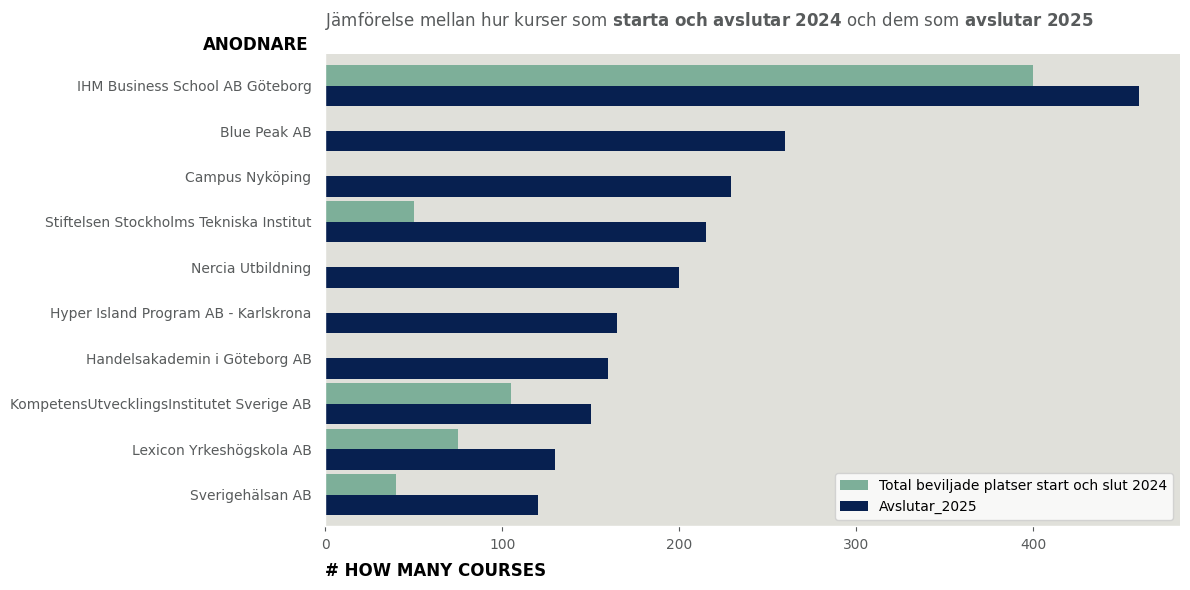

In [116]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("base.mplstyle")

colors = ["#7DAF99", "#072050"]



def horizontal_bar(ax, **option):

    ax.invert_yaxis()

    # clutter
    ax.tick_params("y", length=0, pad=10)
    

    # Describle title and label -> call to action
    ax.set_title(
        option.get("title", ""),
        loc="left",
        pad=option.get("pad", 15),
    )
    # contrast
    ax.set_ylabel(option.get("y_title", ""), loc="top", rotation=0, fontsize=option.get("y_font", 12))
    ax.yaxis.set_label_coords(option.get("ylabel_xcoords", 0), option.get("ylabel_ycoords", 0))
    ax.set_xlabel(option.get("x_title", ""), loc="left", fontsize=option.get("x_font", 12))
    ax.set_facecolor(option.get("facecolor", "#E0E0DA"))
    
    # ax.legend().remove()
    return ax

fig, ax = plt.subplots(figsize=(12, 6))

ax = df_alla_beviljade.drop(
    ["Total", "Total beviljade platser 2025", "Total beviljade platser 2024"], axis=1
)[:10].plot(kind="barh", ax=ax, color=colors, width=0.9)


ax = horizontal_bar(
    ax,
    title=r"Jämförelse mellan hur kurser som $\mathbf{starta\ och\ avslutar\ 2024}$ och dem som $\mathbf{avslutar\ 2025}$",
    pad= 20,
    y_title = "ANODNARE",
    x_title= "# HOW MANY COURSES",
    ylabel_xcoords= -0.02,
    ylabel_ycoords= 1,
)


def save_fig_from_ax(ax, fig_path, **option):
    
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(fig_path, dpi= option.get("dpi", 300))

save_fig_from_ax(ax, "../figures/anordnare_kurser_start_avslut_2024.png")


In [111]:
df_resutalt_ansonkningar[["Anordnare namn", "Utbildningsnamn", "Utbildningsområde"]].sort_values(by= "Anordnare namn", ascending= False)

,Anordnare namn,Utbildningsnamn,Utbildningsområde
197,Östsvenska Yrkeshögskolan AB,Hållbara transporter,"Ekonomi, administration och försäljning"
198,Östsvenska Yrkeshögskolan AB,Sakkunnig inom tull,"Ekonomi, administration och försäljning"
50,Åsbro Kursgård AB,Reservkraft för säkrad elförsörjning,Teknik och tillverkning
52,Åsbro Kursgård AB,Riskhantering av induktion vid högspänningsanl...,Teknik och tillverkning
44,"Älmhults kommun, Haganässkolan",Livscykelanalys för förpackningsindustrin - Li...,"Kultur, media och design"
...,...,...,...
440,AGSTU AB,FPGA Systemkonstruktion med VHDL,Teknik och tillverkning
279,ABF Göteborg Vuxenutbildning AB,Naturvetenskap och teknik i förskolan,Pedagogik och undervisning
275,ABF Göteborg Vuxenutbildning AB,Design av digital didaktik,Pedagogik och undervisning
273,ABF Göteborg Vuxenutbildning AB,AI i utbildning,Pedagogik och undervisning


In [112]:
df_antal_utbildningsområde = df_resutalt_ansonkningar.groupby(["Utbildningsområde", "Anordnare namn"])["Utbildningsnamn"].count().reset_index(name="Antal utbildningar")

ordning = ["Anordnare namn", "Antal utbildningar", "Utbildningsområde"]

df_antal_utbildningsområde = df_antal_utbildningsområde[ordning]

df_antal_utbildningsområde.sort_values(by="Antal utbildningar", ascending=False)

,Anordnare namn,Antal utbildningar,Utbildningsområde
45,IHM Business School AB Göteborg,24,"Ekonomi, administration och försäljning"
197,YH Akademin AB,10,Teknik och tillverkning
154,Nackademin AB,9,Samhällsbyggnad och byggteknik
91,KompetensUtvecklingsInstitutet Sverige AB,8,Hälso- och sjukvård samt socialt arbete
20,Medieinstitutet i Sverige AB,8,Data/IT
...,...,...,...
195,Västerås Stad/Barn- och Utbildningsförvaltning...,1,Teknik och tillverkning
194,Trelleborgs kommun,1,Teknik och tillverkning
199,Amsac AB,1,Transporttjänster
200,"Göteborgs Stad, Yrgo",1,Transporttjänster
